In [2]:
import pandas as pd
import numpy as np
import os

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Read the CSV file
df = pd.read_csv(r'/root/autodl-tmp/AAC concrete dataset large ratio.csv')

# Define original feature columns and target columns
original_feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

target_cols = ["7d CS", "28d CS"]

# Drop unwanted columns: "MnO", "Initial curing time (day)", "Initial curing rest time (day)"
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df = df.drop(columns=cols_to_drop)

# Update the feature columns list accordingly (remove dropped columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Convert target columns to numeric (replacing empty strings with NaN)
for col in target_cols:
    df[col] = pd.to_numeric(df[col].replace(' ', np.nan), errors='coerce')

# Print missing values in target columns
print("Missing values in target columns:")
print(df[target_cols].isnull().sum())

# Drop rows with missing target values
df_clean = df.dropna(subset=target_cols)
print(f"Dataset shape after dropping rows with missing targets: {df_clean.shape}")

# Fill missing values in specific feature columns using the median
df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())

# Extract feature and target arrays
X = df_clean[feature_cols].values
y_7 = df_clean["7d CS"].values
y_28 = df_clean["28d CS"].values

print("X shape:", X.shape)
print("y_7 shape:", y_7.shape)
print("y_28 shape:", y_28.shape)


Current working directory: /root/autodl-tmp
Missing values in target columns:
7d CS     621
28d CS    667
dtype: int64
Dataset shape after dropping rows with missing targets: (630, 73)
X shape: (630, 22)
y_7 shape: (630,)
y_28 shape: (630,)


/tmp/ipykernel_1184/748150047.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
/tmp/ipykernel_1184/748150047.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Display summary statistics to check scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print("Summary statistics for scaled features:")
print(scaled_df.describe().loc[['mean', 'std']].T)


Summary statistics for scaled features:
                                 mean       std
SiO2                     1.578984e-16  1.000795
Al2O3                    9.022765e-17  1.000795
Fe2O3                    2.255691e-17  1.000795
CaO                     -1.578984e-16  1.000795
MgO                     -6.767074e-17  1.000795
Na2O                     1.353415e-16  1.000795
K2O                     -9.022765e-17  1.000795
SO3                     -6.767074e-17  1.000795
TiO2                     6.767074e-17  1.000795
P2O5                     0.000000e+00  1.000795
SrO                      6.203151e-17  1.000795
Mn2O3                   -5.639228e-17  1.000795
LOI                      0.000000e+00  1.000795
AL/B                    -7.556566e-16  1.000795
SH/SS                    2.819614e-17  1.000795
Ms                       2.030122e-16  1.000795
Ag/B                     5.075305e-16  1.000795
W/B                     -1.127846e-17  1.000795
Sp/B                    -5.639228e-17  1.000795


NameError: name 'sns' is not defined

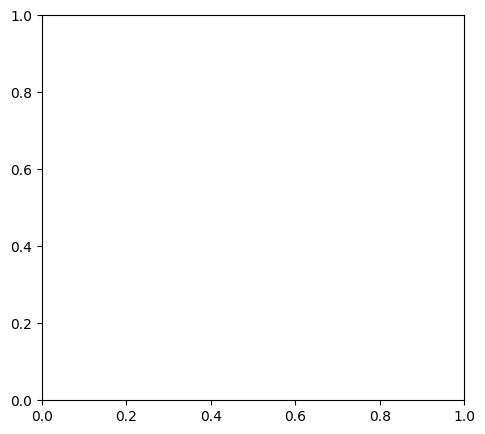

In [4]:
# Compare a couple of features before and after scaling
feature_idx = 0  # Change this index to inspect other features
feature_name = feature_cols[feature_idx]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean[feature_name], kde=True)
plt.title(f"Original {feature_name}")

plt.subplot(1, 2, 2)
sns.histplot(scaled_df[feature_name], kde=True)
plt.title(f"Scaled {feature_name}")
plt.show()


In [5]:
# Check missing values in the original DataFrame for feature and target columns
print("Missing values in original DataFrame:")
print(df[feature_cols + target_cols].isnull().sum())

# Check missing values in cleaned DataFrame
print("Missing values in cleaned DataFrame:")
print(df_clean[feature_cols + target_cols].isnull().sum())


Missing values in original DataFrame:
SiO2                         0
Al2O3                        0
Fe2O3                        0
CaO                          0
MgO                          0
Na2O                         1
K2O                          2
SO3                          0
TiO2                         0
P2O5                         0
SrO                          0
Mn2O3                        0
LOI                          0
AL/B                         0
SH/SS                        0
Ms                           0
Ag/B                         0
W/B                          0
Sp/B                         0
Initial curing temp (C)      1
Final curing temp (C)        0
Concentration (M) NaOH      18
7d CS                      621
28d CS                     667
dtype: int64
Missing values in cleaned DataFrame:
SiO2                       0
Al2O3                      0
Fe2O3                      0
CaO                        0
MgO                        0
Na2O                   

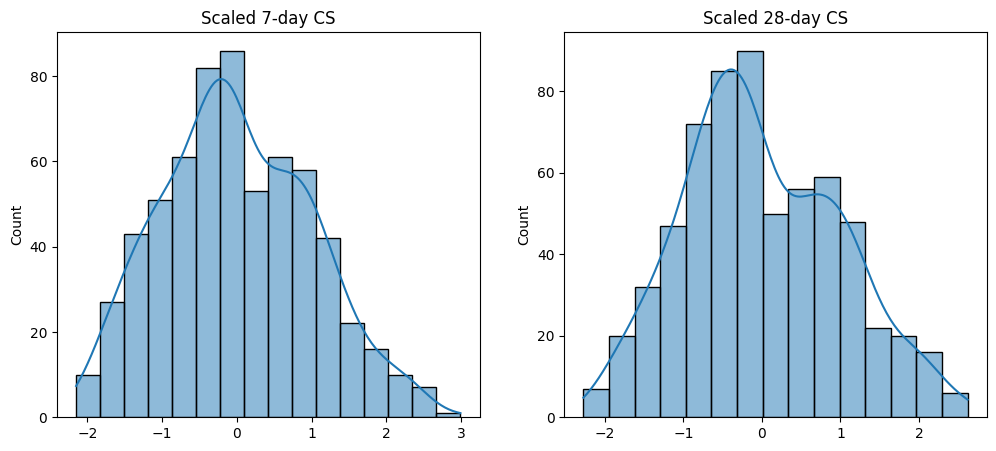

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets using y_7 and y_28 (assumes these are defined)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Visualize the scaled targets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(targets_scaled[:, 0], kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(targets_scaled[:, 1], kde=True)
plt.title("Scaled 28-day CS")
plt.show()


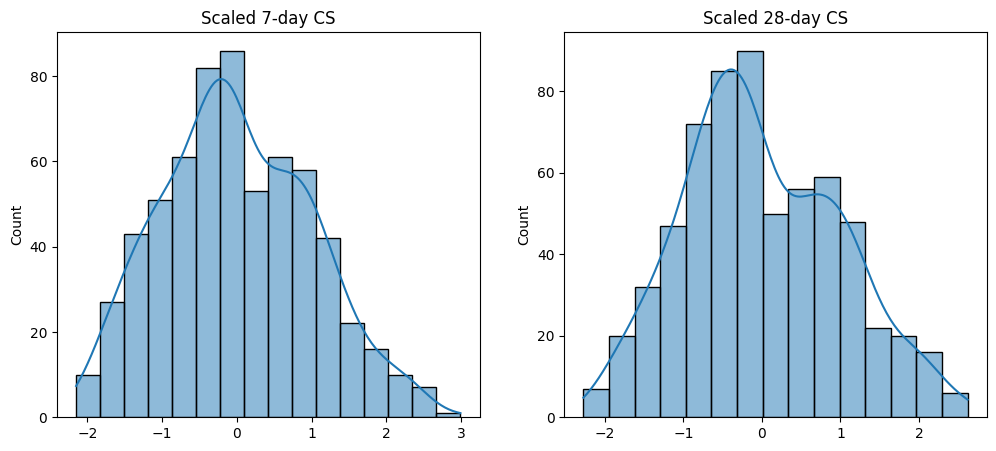

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets (assumes y_7 and y_28 are defined from your cleaned dataset)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Split the scaled targets into separate arrays
y_7_scaled = targets_scaled[:, 0]
y_28_scaled = targets_scaled[:, 1]

# Optional: Visualize the scaled target distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_7_scaled, kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(y_28_scaled, kde=True)
plt.title("Scaled 28-day CS")
plt.show()


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


Dataset size (scaled targets): 630


In [76]:
import torch.nn as nn
import torch.nn.functional as F

class AGPModelModified(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelModified, self).__init__()
        # Increased capacity: two hidden layers
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)  # Outputs: theta1 and theta2
        self.softplus = nn.Softplus()  # to enforce theta1 > 0

    def forward(self, z, t):
        # z: (batch_size, input_dim)
        hidden = F.relu(self.fc1(z))
        hidden = F.relu(self.fc2(hidden))
        theta = self.fc3(hidden)  # (batch_size, 2)
        
        # Enforce positive theta1
        theta1 = self.softplus(theta[:, 0])  # (batch_size,)
        theta2 = theta[:, 1]                 # (batch_size,)
        
        # Use fixed time vector (if t is batched, take the first row)
        if t.ndim > 1:
            t_fixed = t[0]  # shape: (2,)
        else:
            t_fixed = t
        
        epsilon = 1e-6  # to avoid log(0)
        log_t = torch.log(t_fixed + epsilon).unsqueeze(0)  # shape: (1, 2)
        
        # Reshape theta1 and theta2 for broadcasting
        theta1 = theta1.unsqueeze(1)  # (batch_size, 1)
        theta2 = theta2.unsqueeze(1)  # (batch_size, 1)
        
        # Compute predictions: y(t) = theta1 * log(t + epsilon) + theta2
        y_pred = theta1 * log_t + theta2  # shape: (batch_size, 2)
        return y_pred

# Instantiate the modified model with your input dimension (should be 22)
input_dim = X_scaled.shape[1]
model_mod = AGPModelModified(input_dim)
print(model_mod)


AGPModelModified(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)


In [77]:
import torch.optim as optim

# Training parameters
learning_rate = 0.001
epochs = 100

criterion = nn.MSELoss()
optimizer_mod = optim.Adam(model_mod.parameters(), lr=learning_rate)

model_mod.train()
for epoch in range(epochs):
    for z, t, y in dataloader_scaled:
        optimizer_mod.zero_grad()
        y_pred = model_mod(z, t)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer_mod.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 2.5692
Epoch 20/100, Loss: 1.8888
Epoch 30/100, Loss: 1.2468
Epoch 40/100, Loss: 0.8482
Epoch 50/100, Loss: 0.7259
Epoch 60/100, Loss: 0.6612
Epoch 70/100, Loss: 0.6033
Epoch 80/100, Loss: 0.5657
Epoch 90/100, Loss: 0.5341
Epoch 100/100, Loss: 0.5081


In [78]:
model_mod.eval()
with torch.no_grad():
    for z, t, y in dataloader_scaled:
        y_pred_scaled = model_mod(z, t)

# Convert predictions to NumPy array
y_pred_scaled_np = y_pred_scaled.numpy()

# Inverse transform the predictions to the original scale.
# Note: The StandardScaler expects a 2D array.
y_pred_original = target_scaler.inverse_transform(y_pred_scaled_np)

# Also inverse-transform the true targets for comparison
y_true_scaled_np = y.numpy()  # Scaled true targets from the dataset
y_true_original = target_scaler.inverse_transform(y_true_scaled_np)

print("Sample predictions (first 5 samples) in original scale:")
print(y_pred_original[:5])
print("\nGround truth (first 5 samples) in original scale:")
print(y_true_original[:5])


Sample predictions (first 5 samples) in original scale:
[[16.28239  26.537437]
 [25.53544  37.730324]
 [25.53544  37.730324]
 [25.53544  37.730324]
 [24.78595  36.80553 ]]

Ground truth (first 5 samples) in original scale:
[[46.4   48.   ]
 [24.736 27.888]
 [30.656 33.088]
 [53.672 54.024]
 [36.768 38.448]]


In [79]:
from sklearn.metrics import r2_score

# Compute R² for each target on the original scale.
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R^2 for 7-day compressive strength:", r2_7)
print("R^2 for 28-day compressive strength:", r2_28)


R^2 for 7-day compressive strength: 0.43221455812454224
R^2 for 28-day compressive strength: 0.5561975240707397


Dataset size (scaled targets): 630
AGPModelModified(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/100, Loss: 5.1405
Epoch 20/100, Loss: 4.2187
Epoch 30/100, Loss: 3.2796
Epoch 40/100, Loss: 2.3436
Epoch 50/100, Loss: 1.5342
Epoch 60/100, Loss: 0.9969
Epoch 70/100, Loss: 0.7526
Epoch 80/100, Loss: 0.6741
Epoch 90/100, Loss: 0.6322
Epoch 100/100, Loss: 0.5933
R^2 for 7-day compressive strength: 0.33738911151885986
R^2 for 28-day compressive strength: 0.48282700777053833


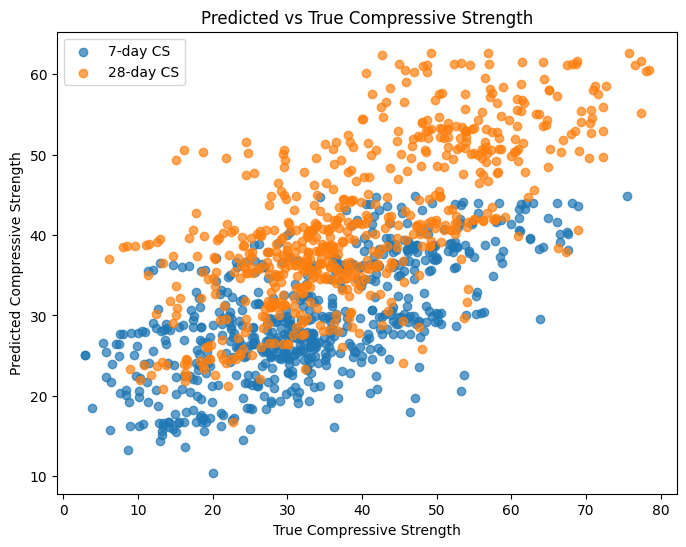

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# ----------------------------
# 1. Define the Custom Dataset
# ----------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


# ----------------------------
# 2. Define the Modified AGP Model
# ----------------------------
class AGPModelModified(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelModified, self).__init__()
        # Two hidden layers for increased capacity
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)  # Outputs: theta1 and theta2
        self.softplus = nn.Softplus()  # Enforces theta1 > 0

    def forward(self, z, t):
        hidden = F.relu(self.fc1(z))
        hidden = F.relu(self.fc2(hidden))
        theta = self.fc3(hidden)  # (batch_size, 2)
        
        # Enforce positive theta1
        theta1 = self.softplus(theta[:, 0])  # (batch_size,)
        theta2 = theta[:, 1]                 # (batch_size,)
        
        # Use fixed time vector (if t is batched, take the first row)
        if t.ndim > 1:
            t_fixed = t[0]  # shape: (2,)
        else:
            t_fixed = t
        
        epsilon = 1e-6  # Avoid log(0)
        log_t = torch.log(t_fixed + epsilon).unsqueeze(0)  # shape: (1, 2)
        
        # Reshape theta1 and theta2 for broadcasting
        theta1 = theta1.unsqueeze(1)  # (batch_size, 1)
        theta2 = theta2.unsqueeze(1)  # (batch_size, 1)
        
        # Prediction: y(t) = theta1 * log(t + epsilon) + theta2
        y_pred = theta1 * log_t + theta2  # shape: (batch_size, 2)
        return y_pred

# Instantiate the model using the input dimension (should be 22)
input_dim = X_scaled.shape[1]
model_mod = AGPModelModified(input_dim)
print(model_mod)


# ----------------------------
# 3. Define Default Training & Evaluation Functions
# ----------------------------
def train_model(model, dataloader, optimizer, criterion, epochs=100):
    model.train()
    for epoch in range(epochs):
        for z, t, y in dataloader:
            optimizer.zero_grad()
            y_pred = model(z, t)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

def evaluate_model(model, dataloader):
    model.eval()
    with torch.no_grad():
        for z, t, y in dataloader:
            y_pred = model(z, t)
    return y_pred, y

# ----------------------------
# 4. Train the Model Using Default Settings
# ----------------------------
# Default training parameters
LEARNING_RATE = 0.001
EPOCHS = 100

criterion = nn.MSELoss()
optimizer_mod = optim.Adam(model_mod.parameters(), lr=LEARNING_RATE)

# Train the model
train_model(model_mod, dataloader_scaled, optimizer_mod, criterion, epochs=EPOCHS)


# ----------------------------
# 5. Evaluate the Model and Compute R² Scores
# ----------------------------
# Evaluate on the training set (or use a validation set if available)
y_pred_scaled, y_scaled = evaluate_model(model_mod, dataloader_scaled)

# Convert predictions and true targets to NumPy arrays
y_pred_scaled_np = y_pred_scaled.numpy()
y_true_scaled_np = y_scaled.numpy()

# Inverse-transform predictions and true targets to original scale.
# (Assumes target_scaler was defined and fitted on original target values.)
y_pred_original = target_scaler.inverse_transform(y_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_true_scaled_np)

# Compute R² scores for 7-day and 28-day compressive strengths
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R^2 for 7-day compressive strength:", r2_7)
print("R^2 for 28-day compressive strength:", r2_28)

# ----------------------------
# 6. (Optional) Visualize Predictions vs Ground Truth
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Dataset size (scaled targets): 630
AGPModelGP(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/500, NLL Loss: 4.5649
Epoch 20/500, NLL Loss: 4.2715
Epoch 30/500, NLL Loss: 4.0071
Epoch 40/500, NLL Loss: 3.7463
Epoch 50/500, NLL Loss: 3.4694
Epoch 60/500, NLL Loss: 3.1679
Epoch 70/500, NLL Loss: 2.8493
Epoch 80/500, NLL Loss: 2.5464
Epoch 90/500, NLL Loss: 2.3334
Epoch 100/500, NLL Loss: 2.1866
Epoch 110/500, NLL Loss: 2.0702
Epoch 120/500, NLL Loss: 1.9716
Epoch 130/500, NLL Loss: 1.8791
Epoch 140/500, NLL Loss: 1.7914
Epoch 150/500, NLL Loss: 1.7049
Epoch 160/500, NLL Loss: 1.6199
Epoch 170/500, NLL Loss: 1.5388
Epoch 180/500, NLL Loss: 1.4627
Epoch 190/500, NLL Loss: 1.3950
Epoch 200/500, NLL Loss: 1.3288
Epoch 210/500, NLL Loss: 1.2669
Epoch 220/500, NLL Loss: 1.2059
Epoch 230/500

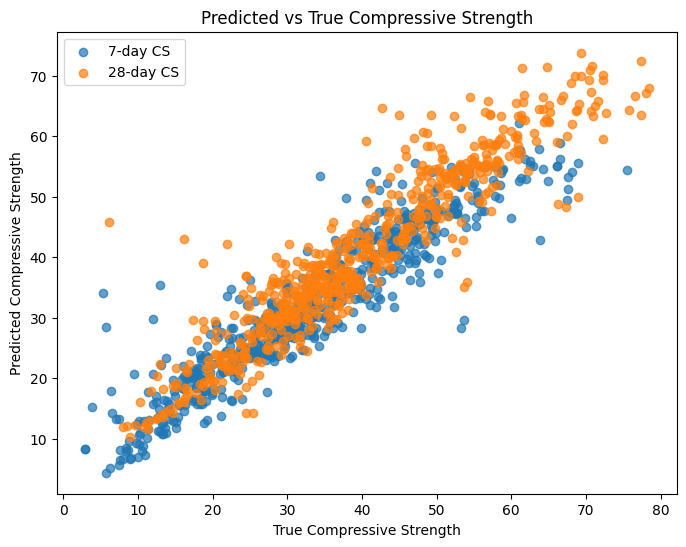

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))

# -----------------------------------------------------------------------------
# 3. AGP Model with GP Hyperparameters
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelGP, self).__init__()
        # Two hidden layers MLP mapping mix design features to GP hyperparameters.
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        # Output 5 parameters: theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(16, 5)
        self.softplus = nn.Softplus()  # to enforce positivity where needed

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: slope for the mean function (enforced positive)
          theta2: intercept for the mean function
          l: lengthscale for the kernel (positive)
          sigma_f: kernel variance (positive)
          sigma_n: noise variance (positive)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# Instantiate the model (input_dim should match your feature count, e.g., 22)
input_dim = X_scaled.shape[1]
model_gp = AGPModelGP(input_dim).to(device)
print(model_gp)

# -----------------------------------------------------------------------------
# 4. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    Compute the GP negative log likelihood over a batch.
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: tensors of shape (batch_size,)
      t: 1D tensor of time points, shape (n_t,) (e.g., [7.0, 28.0])
      y: tensor of true targets for each sample, shape (batch_size, n_t)
      epsilon: small constant for numerical stability.
    
    Returns:
      Mean negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # number of time points, should be 2
    total_nll = 0.0
    # Precompute log(t + epsilon) for the mean function
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # Compute the mean vector for sample i
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # Compute pairwise squared differences for time points
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # Add noise variance to the diagonal
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # Add jitter for numerical stability
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # Compute the Cholesky decomposition
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 5. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # Move data to device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    Evaluate model using the mean function prediction.
    Returns predictions and true targets.
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # Move data to device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 6. Training the Model
# -----------------------------------------------------------------------------
# Fixed time vector as a torch tensor (for 7 and 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Set up optimizer and training parameters
learning_rate = 0.001
epochs = 500
optimizer_gp = optim.Adam(model_gp.parameters(), lr=learning_rate)

# Train the GP model
train_gp_model(model_gp, dataloader_scaled, t_fixed, optimizer_gp, epochs=epochs)

# -----------------------------------------------------------------------------
# 7. Evaluation and R² Computation
# -----------------------------------------------------------------------------
# Evaluate model to get mean function predictions
m_pred_scaled, y_scaled = evaluate_gp_model(model_gp, dataloader_scaled, t_fixed)

# Convert predictions and targets to NumPy arrays
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# Inverse-transform to original scale.
# (Assumes target_scaler was defined and fitted on original target values.)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

# Compute R² scores for each target
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("R² for 7-day compressive strength:", r2_7)
print("R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 8. (Optional) Visualize Predictions vs Ground Truth
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126
AGPModelGP(
  (fc1): Linear(in_features=22, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Epoch 10/500, NLL Loss: 4.2875
Epoch 20/500, NLL Loss: 3.8517
Epoch 30/500, NLL Loss: 3.4600
Epoch 40/500, NLL Loss: 3.1573
Epoch 50/500, NLL Loss: 2.9258
Epoch 60/500, NLL Loss: 2.7308
Epoch 70/500, NLL Loss: 2.5685
Epoch 80/500, NLL Loss: 2.4334
Epoch 90/500, NLL Loss: 2.3136
Epoch 100/500, NLL Loss: 2.2065
Epoch 110/500, NLL Loss: 2.1056
Epoch 120/500, NLL Loss: 2.0123
Epoch 130/500, NLL Loss: 1.9289
Epoch 140/500, NLL Loss: 1.8543
Epoch 150/500, NLL Loss: 1.7843
Epoch 160/500, NLL Loss: 1.7173
Epoch 170/500, NLL Loss: 1.6528
Epoch 180/500, NLL Loss: 1.5901
Epoch 190/500, NLL Loss: 1.5263
Epoch 200/500, NLL Loss: 1.4604
Epoch 210/500, NLL Loss: 1.3953
Epoch 220/500, NLL Loss: 1.3285
E

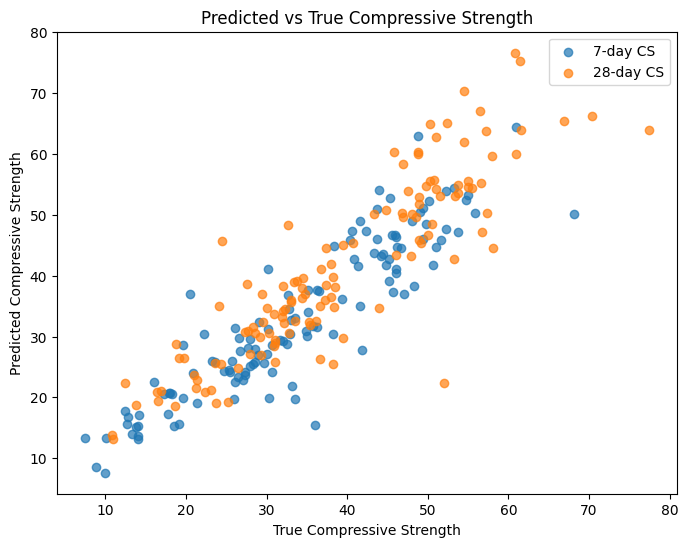

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
# 使用 sklearn 的 train_test_split 進行拆分 (80% train, 20% test)
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# 建立 Dataset
train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 建立 DataLoader (這裡採用 full-batch, 可根據需求調整 batch size)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim):
        super(AGPModelGP, self).__init__()
        # 兩層隱藏層的 MLP，將 mix design features 映射到 GP hyperparameters
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        # 輸出 5 個參數：theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(16, 5)
        self.softplus = nn.Softplus()  # 確保部分參數為正值

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: mean function 的 slope (經過 softplus 保證正值)
          theta2: mean function 的 intercept
          l: kernel 的 lengthscale (正值)
          sigma_f: kernel 的 variance (正值)
          sigma_n: noise variance (正值)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # 形狀: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 假設 input_dim 與 X_scaled 的特徵數相同 (例如 22)
input_dim = X_scaled.shape[1]
model_gp = AGPModelGP(input_dim).to(device)
print(model_gp)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    計算整個 batch 的 GP negative log likelihood (NLL)
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: shape (batch_size,)
      t: 1D tensor，形狀 (n_t,) (例如 [7.0, 28.0])
      y: 真實 target, shape (batch_size, n_t)
      epsilon: 小數值，保證數值穩定性
      
    Returns:
      平均的 negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # time points 數量 (應該是 2)
    total_nll = 0.0
    # 預先計算 log(t + epsilon)
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # 計算第 i 個樣本的 mean vector: m = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # 計算 time point 間的平方差距 (pairwise squared differences)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # 在對角線上加入 noise variance
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # 加入 jitter 增強數值穩定性
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # 使用 Cholesky 分解
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    用 mean function 預測來評估模型。
    返回預測值和真實 target。
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Training the Model
# -----------------------------------------------------------------------------
# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# 設定 optimizer 與 training 參數
learning_rate = 0.001
epochs = 500
optimizer_gp = optim.Adam(model_gp.parameters(), lr=learning_rate)

# 在 training data 上訓練模型
train_gp_model(model_gp, train_loader, t_fixed, optimizer_gp, epochs=epochs)

# -----------------------------------------------------------------------------
# 8. Evaluation and R² Computation on Test Data
# -----------------------------------------------------------------------------
# 使用 test data 進行評估，得到 mean function 預測
m_pred_scaled, y_scaled = evaluate_gp_model(model_gp, test_loader, t_fixed)

# 將預測與 target 轉換為 numpy 陣列
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 利用 target_scaler 進行逆轉換 (注意：target_scaler 須先於原始 target 上進行 fit)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

# 計算 7-day 與 28-day compressive strength 的 R² 分數
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("R² for 7-day compressive strength:", r2_7)
print("R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. (Optional) Visualize Predictions vs Ground Truth
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Predicted vs True Compressive Strength")
plt.show()


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
# 使用 sklearn 的 train_test_split 進行拆分 (80% train, 20% test)
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# 建立 Dataset
train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 建立 DataLoader (這裡採用 full-batch, 可根據需求調整 batch size)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (修改後可接受 hidden_dim 設定)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=32, hidden_dim2=16):
        super(AGPModelGP, self).__init__()
        # 兩層隱藏層的 MLP，將 mix design features 映射到 GP hyperparameters
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # 輸出 5 個參數：theta1, theta2, log(l), log(sigma_f), log(sigma_n)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()  # 確保部分參數為正值

    def forward(self, z):
        """
        Input:
          z: (batch_size, input_dim)
        Outputs (each of shape (batch_size,)):
          theta1: mean function 的 slope (經過 softplus 保證正值)
          theta2: mean function 的 intercept
          l: kernel 的 lengthscale (正值)
          sigma_f: kernel 的 variance (正值)
          sigma_n: noise variance (正值)
        """
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # 形狀: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 假設 input_dim 與 X_scaled 的特徵數相同 (例如 22)
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    計算整個 batch 的 GP negative log likelihood (NLL)
    
    Parameters:
      theta1, theta2, l, sigma_f, sigma_n: shape (batch_size,)
      t: 1D tensor，形狀 (n_t,) (例如 [7.0, 28.0])
      y: 真實 target, shape (batch_size, n_t)
      epsilon: 小數值，保證數值穩定性
      
    Returns:
      平均的 negative log likelihood (scalar)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # time points 數量 (應該是 2)
    total_nll = 0.0
    # 預先計算 log(t + epsilon)
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        # 計算第 i 個樣本的 mean vector: m = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        # 計算 time point 間的平方差距 (pairwise squared differences)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        # Squared-exponential (RBF) kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        # 在對角線上加入 noise variance
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        # 加入 jitter 增強數值穩定性
        K = K + epsilon * torch.eye(n_t, device=K.device)
        # 使用 Cholesky 分解
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 每 10 個 epoch 輸出一次訓練損失
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    """
    用 mean function 預測來評估模型。
    返回預測值和真實 target。
    """
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            # 將資料移至 device
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Hyperparameter Tuning (Grid Search)
# -----------------------------------------------------------------------------
# 定義超參數搜索空間
learning_rates = [0.001, 0.0005]
hidden_dim1_list = [32, 64]
hidden_dim2_list = [16, 32]
num_epochs = 300  # 為了加快搜索速度，可減少訓練 epoch 數

# 用來保存最佳模型與結果
best_r2 = -np.inf
best_params = None
results = []

for lr in learning_rates:
    for hidden_dim1 in hidden_dim1_list:
        for hidden_dim2 in hidden_dim2_list:
            print(f"\nTraining with lr={lr}, hidden_dim1={hidden_dim1}, hidden_dim2={hidden_dim2}")
            
            # 初始化模型與 optimizer
            model = AGPModelGP(input_dim, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2).to(device)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            
            # 訓練模型 (這裡使用 train_loader 上訓練)
            train_gp_model(model, train_loader, t_fixed, optimizer, epochs=num_epochs)
            
            # 在 test_loader 上評估模型 (使用 mean function 預測)
            m_pred_scaled, y_scaled = evaluate_gp_model(model, test_loader, t_fixed)
            m_pred_scaled_np = m_pred_scaled.numpy()
            y_scaled_np = y_scaled.numpy()
            
            # 注意：這裡 target_scaler 須先前對原始 target fit 過
            y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
            y_true_original = target_scaler.inverse_transform(y_scaled_np)
            
            # 計算 R² 分數 (這裡採用 7-day 與 28-day 的平均 R²)
            r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
            r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
            avg_r2 = (r2_7 + r2_28) / 2
            print(f"R² 7-day: {r2_7:.4f},  R² 28-day: {r2_28:.4f},  Avg R²: {avg_r2:.4f}")
            
            # 保存結果
            results.append({
                "lr": lr,
                "hidden_dim1": hidden_dim1,
                "hidden_dim2": hidden_dim2,
                "r2_7": r2_7,
                "r2_28": r2_28,
                "avg_r2": avg_r2
            })
            
            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_params = {"lr": lr, "hidden_dim1": hidden_dim1, "hidden_dim2": hidden_dim2}

print("\nBest Hyperparameters:")
print(best_params)
print("Best Avg R²:", best_r2)

# -----------------------------------------------------------------------------
# 8. (Optional) Visualize Predictions vs Ground Truth with Best Model
# -----------------------------------------------------------------------------
# 重新用最佳超參數訓練一次模型（可使用更多 epoch），並在 test set 上繪圖
model_best = AGPModelGP(input_dim, hidden_dim1=best_params["hidden_dim1"], hidden_dim2=best_params["hidden_dim2"]).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_params["lr"])
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126

Training with lr=0.001, hidden_dim1=32, hidden_dim2=16
Epoch 10/300, NLL Loss: 3.8171
Epoch 20/300, NLL Loss: 3.6415
Epoch 30/300, NLL Loss: 3.4758
Epoch 40/300, NLL Loss: 3.2832
Epoch 50/300, NLL Loss: 3.0487
Epoch 60/300, NLL Loss: 2.7795
Epoch 70/300, NLL Loss: 2.5350
Epoch 80/300, NLL Loss: 2.3778
Epoch 90/300, NLL Loss: 2.2534
Epoch 100/300, NLL Loss: 2.1414
Epoch 110/300, NLL Loss: 2.0357
Epoch 120/300, NLL Loss: 1.9330
Epoch 130/300, NLL Loss: 1.8320
Epoch 140/300, NLL Loss: 1.7368
Epoch 150/300, NLL Loss: 1.6504
Epoch 160/300, NLL Loss: 1.5741
Epoch 170/300, NLL Loss: 1.5021
Epoch 180/300, NLL Loss: 1.4331
Epoch 190/300, NLL Loss: 1.3667
Epoch 200/300, NLL Loss: 1.2998
Epoch 210/300, NLL Loss: 1.2308
Epoch 220/300, NLL Loss: 1.1619
Epoch 230/300, NLL Loss: 1.0940
Epoch 240/300, NLL Loss: 1.0302
Epoch 250/300, NLL Loss: 0.9611
Epoch 260/300, NLL Loss: 0.9007
Epoch 270/300, NLL Loss: 0.8452
Epoch 280/300, NLL Loss

NameError: name 'epochs' is not defined

Epoch 10/500, NLL Loss: 3.8942
Epoch 20/500, NLL Loss: 3.4957
Epoch 30/500, NLL Loss: 3.0842
Epoch 40/500, NLL Loss: 2.6668
Epoch 50/500, NLL Loss: 2.3866
Epoch 60/500, NLL Loss: 2.2076
Epoch 70/500, NLL Loss: 2.0358
Epoch 80/500, NLL Loss: 1.8860
Epoch 90/500, NLL Loss: 1.7554
Epoch 100/500, NLL Loss: 1.6408
Epoch 110/500, NLL Loss: 1.5333
Epoch 120/500, NLL Loss: 1.4267
Epoch 130/500, NLL Loss: 1.3177
Epoch 140/500, NLL Loss: 1.2055
Epoch 150/500, NLL Loss: 1.0966
Epoch 160/500, NLL Loss: 0.9927
Epoch 170/500, NLL Loss: 0.8882
Epoch 180/500, NLL Loss: 0.7904
Epoch 190/500, NLL Loss: 0.7039
Epoch 200/500, NLL Loss: 0.6407
Epoch 210/500, NLL Loss: 0.5764
Epoch 220/500, NLL Loss: 0.5329
Epoch 230/500, NLL Loss: 0.5012
Epoch 240/500, NLL Loss: 0.4527
Epoch 250/500, NLL Loss: 0.4192
Epoch 260/500, NLL Loss: 0.3863
Epoch 270/500, NLL Loss: 0.3605
Epoch 280/500, NLL Loss: 0.3330
Epoch 290/500, NLL Loss: 0.3096
Epoch 300/500, NLL Loss: 0.2839
Epoch 310/500, NLL Loss: 0.2606
Epoch 320/500, NL

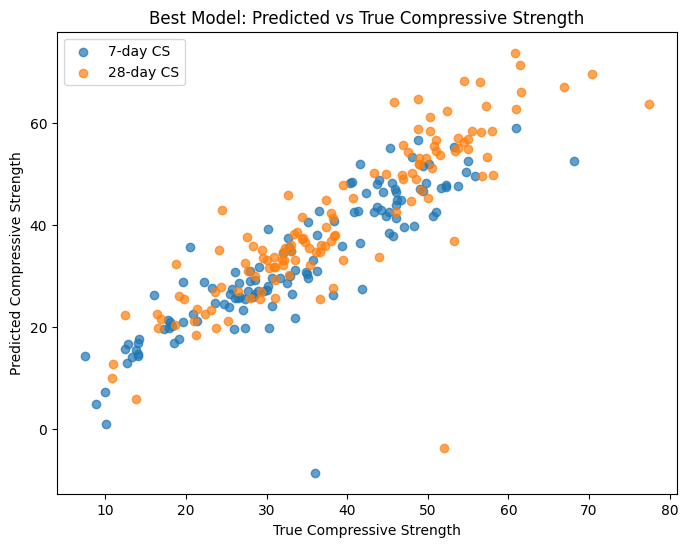

In [11]:
epochs = 500
model_best = AGPModelGP(input_dim, hidden_dim1=best_params["hidden_dim1"], hidden_dim2=best_params["hidden_dim2"]).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_params["lr"])
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()

In [12]:
from sklearn.metrics import r2_score

# Calculate R2 scores for each compressive strength metric
r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])

print("R2 for 7-day CS:", r2_7)
print("R2 for 28-day CS:", r2_28)


R2 for 7-day CS: 0.7458240985870361
R2 for 28-day CS: 0.6623019576072693


Using device: cuda
Train dataset size: 504
Test dataset size: 126
Epoch 10/500, NLL Loss: 4.2732, LR: 0.001000
Epoch 20/500, NLL Loss: 3.6256, LR: 0.001000
Epoch 30/500, NLL Loss: 3.1974, LR: 0.001000
Epoch 40/500, NLL Loss: 2.8824, LR: 0.001000
Epoch 50/500, NLL Loss: 2.6116, LR: 0.001000
Epoch 60/500, NLL Loss: 2.3802, LR: 0.001000
Epoch 70/500, NLL Loss: 2.2256, LR: 0.001000
Epoch 80/500, NLL Loss: 2.0953, LR: 0.001000
Epoch 90/500, NLL Loss: 1.9745, LR: 0.001000
Epoch 100/500, NLL Loss: 1.8555, LR: 0.000500
Epoch 110/500, NLL Loss: 1.7931, LR: 0.000500
Epoch 120/500, NLL Loss: 1.7358, LR: 0.000500
Epoch 130/500, NLL Loss: 1.6797, LR: 0.000500
Epoch 140/500, NLL Loss: 1.6258, LR: 0.000500
Epoch 150/500, NLL Loss: 1.5738, LR: 0.000500
Epoch 160/500, NLL Loss: 1.5219, LR: 0.000500
Epoch 170/500, NLL Loss: 1.4698, LR: 0.000500
Epoch 180/500, NLL Loss: 1.4172, LR: 0.000500
Epoch 190/500, NLL Loss: 1.3639, LR: 0.000500
Epoch 200/500, NLL Loss: 1.3097, LR: 0.000250
Epoch 210/500, NLL Loss

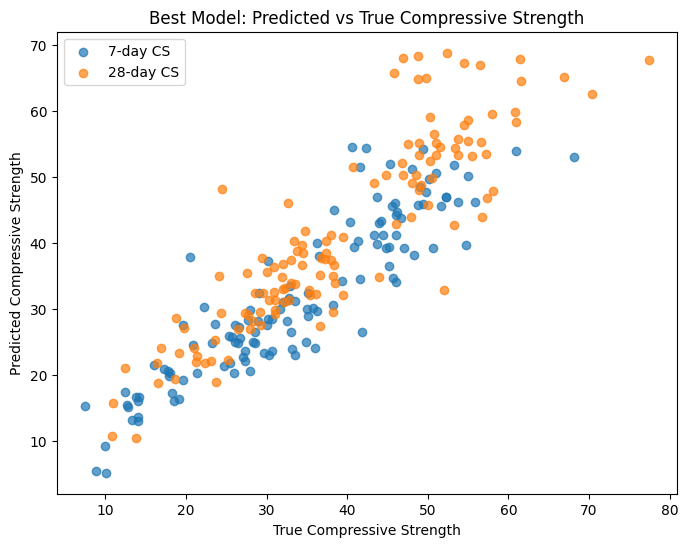

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (支持自定義 hidden_dim)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=32, hidden_dim2=16):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)  # 輸出 5 個參數
        self.softplus = nn.Softplus()  # 保證部分參數為正

    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 假設特徵數 (例如 22)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7.0, 28.0)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (含 StepLR)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, scheduler, epochs=100):
    """
    修改點：
    1. 在函數參數中增加 scheduler，並在每個 epoch 結束後調用 scheduler.step()。
    2. 每隔 10 個 epoch 輸出目前的 NLL 與當前的 learning rate。
    """
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()  # 更新 learning rate
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            current_lr = scheduler.get_last_lr()[0]
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}, LR: {current_lr:.6f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 利用最佳超參數重新訓練最終模型 (使用 StepLR 調整 learning rate)
# -----------------------------------------------------------------------------
epochs = 500  # 定義總訓練 epoch 數

# 使用最佳超參數初始化模型 (最佳超參數：lr=0.001, hidden_dim1=64, hidden_dim2=32)
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.001)
scheduler_best = optim.lr_scheduler.StepLR(optimizer_best, step_size=100, gamma=0.5)

# 重新訓練最終模型
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, scheduler_best, epochs=epochs)

# -----------------------------------------------------------------------------
# 8. 在 test set 上評估模型並計算 R² 分數
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 利用 target_scaler 逆轉換 (請確保 target_scaler 已對原始 target fit)
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final R² for 7-day compressive strength:", r2_7)
print("Final R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. 可視化結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


In [18]:
# 訓練完成後打印最終模型參數
print("Final Model Parameters:")
for name, param in model_best.state_dict().items():
    print(name, param)

# 也可以打印當前的 learning rate
final_lr = optimizer_best.param_groups[0]['lr']
print("Final Learning Rate:", final_lr)


Final Model Parameters:
fc1.weight tensor([[ 0.0423,  0.1869,  0.0563,  ..., -0.1890, -0.1892,  0.0312],
        [-0.0176,  0.0055,  0.2174,  ..., -0.1798, -0.1272, -0.3104],
        [-0.1576, -0.1653, -0.0359,  ...,  0.0943,  0.1990,  0.1105],
        ...,
        [ 0.1732, -0.1848,  0.1226,  ...,  0.0946,  0.3076,  0.1431],
        [-0.3374, -0.1440,  0.2584,  ...,  0.1861, -0.0099,  0.2540],
        [-0.2389, -0.0666,  0.1336,  ...,  0.1855,  0.2301, -0.1195]],
       device='cuda:0')
fc1.bias tensor([ 0.1505, -0.2232, -0.0572, -0.0709, -0.1773,  0.1418, -0.0235,  0.0278,
         0.1649,  0.1700,  0.0156,  0.1367, -0.2717,  0.0792, -0.1537,  0.0999,
        -0.1409,  0.0605, -0.0186, -0.0152, -0.1376,  0.0791,  0.1544, -0.0333,
        -0.0435,  0.1577,  0.0496, -0.1946,  0.0843,  0.0200,  0.0369, -0.0882,
         0.1514,  0.1653, -0.1418, -0.1410,  0.0123,  0.1412,  0.2527,  0.1774,
         0.0339, -0.2174, -0.1208, -0.0769,  0.1137, -0.1436,  0.0786,  0.1476,
        -0.1504,  

Using device: cuda
Train dataset size: 504
Test dataset size: 126
Epoch 10/200, NLL Loss: 4.3496
Epoch 20/200, NLL Loss: 3.7097
Epoch 30/200, NLL Loss: 3.3577
Epoch 40/200, NLL Loss: 2.9791
Epoch 50/200, NLL Loss: 2.6263
Epoch 60/200, NLL Loss: 2.3721
Epoch 70/200, NLL Loss: 2.2114
Epoch 80/200, NLL Loss: 2.0773
Epoch 90/200, NLL Loss: 1.9569
Epoch 100/200, NLL Loss: 1.8477
Epoch 110/200, NLL Loss: 1.7455
Epoch 120/200, NLL Loss: 1.6494
Epoch 130/200, NLL Loss: 1.5557
Epoch 140/200, NLL Loss: 1.4606
Epoch 150/200, NLL Loss: 1.3656
Epoch 160/200, NLL Loss: 1.2711
Epoch 170/200, NLL Loss: 1.1778
Epoch 180/200, NLL Loss: 1.0864
Epoch 190/200, NLL Loss: 0.9989
Epoch 200/200, NLL Loss: 0.9145
Final Learning Rate: 0.001
Final Model Parameters:
fc1.weight tensor([[ 0.1417, -0.0349,  0.0724,  ...,  0.0147, -0.0529,  0.1847],
        [-0.2191,  0.1234,  0.2882,  ...,  0.0202,  0.1995,  0.1754],
        [ 0.2250,  0.0091, -0.0757,  ..., -0.0711,  0.1467,  0.1090],
        ...,
        [ 0.0410, 

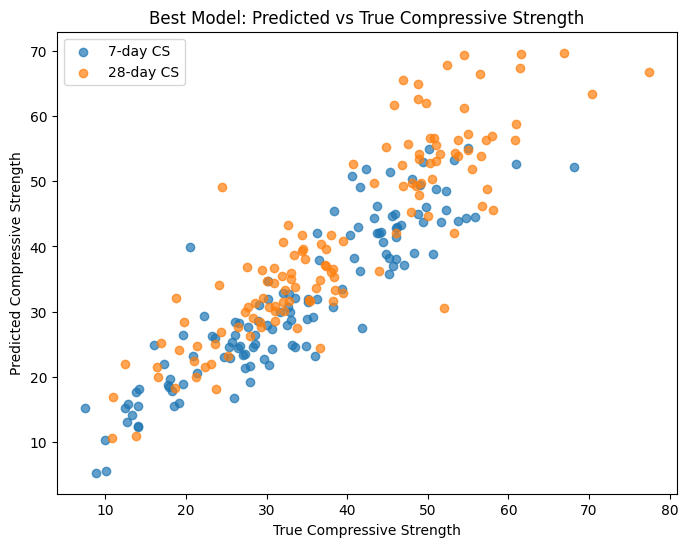

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features 已經經過 scaling (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # 將兩個 target 合併成形狀 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 固定的 time vector，適用於所有樣本
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. 資料分割 (Train/Test Split)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經被定義並處理過
X_train, X_test, y_7_train, y_7_test, y_28_train, y_28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y_7_train, y_28_train)
test_dataset = ConcreteDatasetScaled(X_test, y_7_test, y_28_test)

# 使用 full-batch（若資料量過大請調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. AGP Model with GP Hyperparameters (hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)  # 輸出 5 個參數
        self.softplus = nn.Softplus()  # 保證部分參數為正

    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)  # shape: (batch_size, 5)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 假設特徵數 (例如 22)

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7.0, 28.0)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)  # shape: (n_t,)
    
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]  # shape: (n_t,)
        diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)  # shape: (n_t, 1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m = []
    all_y = []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (對應 7 和 28 days)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 訓練最終模型 (直接使用 lr = 3.125e-05)
# -----------------------------------------------------------------------------
epochs = 200  # 總訓練 epoch 數
# 將初始 learning rate 直接設為 3.125e-05
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.001)

# 訓練模型
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

# 印出最終的 learning rate 與模型參數
final_lr = optimizer_best.param_groups[0]['lr']
print("Final Learning Rate:", final_lr)
print("Final Model Parameters:")
for name, param in model_best.state_dict().items():
    print(name, param)

# -----------------------------------------------------------------------------
# 8. 評估模型並計算 R² 分數
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()

# 請確保 target_scaler 已對原始 target fit 過
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final R² for 7-day compressive strength:", r2_7)
print("Final R² for 28-day compressive strength:", r2_28)

# -----------------------------------------------------------------------------
# 9. 可視化結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model: Predicted vs True Compressive Strength")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation after epoch 1: R² 7-day: -0.4524, R² 28-day: -1.7218, Avg R²: -1.0871
Validation after epoch 2: R² 7-day: 0.0001, R² 28-day: -0.5241, Avg R²: -0.2620
Validation after epoch 3: R² 7-day: -0.0770, R² 28-day: -0.0773, Avg R²: -0.0771
Validation after epoch 4: R² 7-day: -0.2848, R² 28-day: -0.0198, Avg R²: -0.1523
Validation after epoch 5: R² 7-day: -0.2676, R² 28-day: 0.0862, Avg R²: -0.0907
Validation after epoch 6: R² 7-day: -0.0822, R² 28-day: 0.2625, Avg R²: 0.0901
Validation after epoch 7: R² 7-day: 0.1231, R² 28-day: 0.3944, Avg R²: 0.2587
Validation after epoch 8: R² 7-day: 0.2683, R² 28-day: 0.4344, Avg R²: 0.3513
Validation after epoch 9: R² 7-day: 0.3441, R² 28-day: 0.4044, Avg R²: 0.3742
Validation after epoch 10: R² 7-day: 0.3747, R² 28-day: 0.3590, Avg R²: 0.3668
Validation after epoch 11: R² 7-day: 0.3969, R² 28-day: 0.3603, Avg R²: 0.3786
Validation after epoch 12: R² 7-d

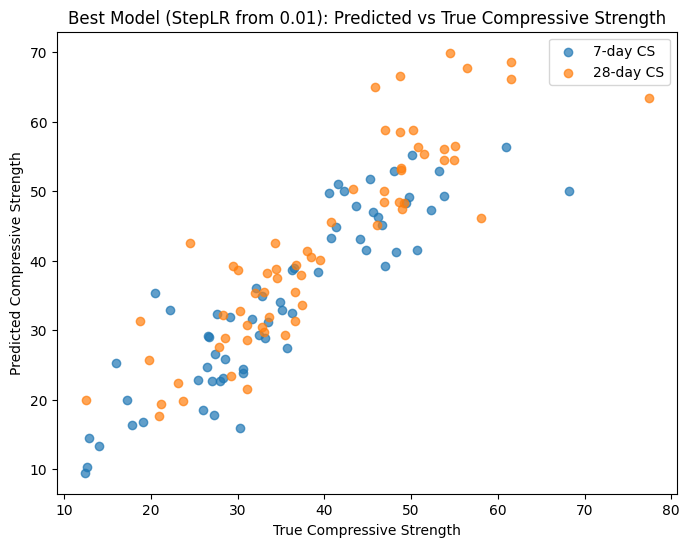

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch 訓練（根據數據大小可以調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (使用 StepLR)
# -----------------------------------------------------------------------------
def train_gp_model_with_scheduler(model, dataloader, t, optimizer, scheduler, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()  # 更新 learning rate
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            current_lr = scheduler.get_last_lr()[0]
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}, LR: {current_lr:.6f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. 使用 StepLR 從 0.01 開始調整 Learning Rate
# -----------------------------------------------------------------------------
epochs = 2000
# 使用最佳超參數：hidden_dim1=64, hidden_dim2=32，初始 lr 設為 0.01
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=0.01)
# 每 100 個 epoch 將 lr 乘以 0.5
scheduler_best = optim.lr_scheduler.StepLR(optimizer_best, step_size=100, gamma=0.5)

# 驗證集監控：使用的是我們拆分出的 val_dataset (X_val, y7_val, y28_val)
best_r2 = -np.inf
best_model_wts = copy.deepcopy(model_best.state_dict())
best_lr = None

for epoch in range(epochs):
    # 訓練一個 epoch
    train_gp_model_with_scheduler(model_best, train_loader, t_fixed, optimizer_best, scheduler_best, epochs=1)
    
    # 在驗證集上評估
    m_val, y_val = evaluate_gp_model(model_best, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Validation after epoch {epoch+1}: R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    
    # 保存最佳模型權重與當時的學習率
    if avg_r2_val > best_r2:
        best_r2 = avg_r2_val
        best_model_wts = copy.deepcopy(model_best.state_dict())
        best_lr = optimizer_best.param_groups[0]['lr']

print("\nBest Validation Avg R²:", best_r2)
print("Best Learning Rate at that time:", best_lr)

# 載入最佳模型權重
model_best.load_state_dict(best_model_wts)

# -----------------------------------------------------------------------------
# 8. 在 Test Set 上評估模型
# -----------------------------------------------------------------------------
m_pred_scaled, y_scaled = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_scaled_np = m_pred_scaled.numpy()
y_scaled_np = y_scaled.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_scaled_np)
y_true_original = target_scaler.inverse_transform(y_scaled_np)

r2_7_test = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_test = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_test)
print("Final Test R² for 28-day compressive strength:", r2_28_test)

# -----------------------------------------------------------------------------
# 9. 可視化 Test Set 結果
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Best Model (StepLR from 0.01): Predicted vs True Compressive Strength")
plt.show()


In [25]:
print("\nBest Validation Avg R²:", best_r2)
print("Best Learning Rate at that time:", best_lr)



Best Validation Avg R²: 0.8164641261100769
Best Learning Rate at that time: 0.0003125


In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經正確定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 這裡使用 full-batch（根據數據量可調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set
# -----------------------------------------------------------------------------
epochs = 500
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nTraining with learning rate = {lr}")
    # 為每個學習率初始化一個新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    train_gp_model(model_temp, train_loader, t_fixed, optimizer_temp, epochs=epochs)
    
    # 在 Validation Set 上評估
    m_val, y_val = evaluate_gp_model(model_temp, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    # 請確保 target_scaler 已對原始 target fit 過
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Learning rate = {lr} => R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    results[lr] = avg_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. Use Best Learning Rate: Re-train Model on Training Set and Evaluate on Test Set
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Training with learning rate = 0.01
Epoch 10/500, NLL Loss: 2.3261
Epoch 20/500, NLL Loss: 1.7703
Epoch 30/500, NLL Loss: 1.4182
Epoch 40/500, NLL Loss: 1.1994
Epoch 50/500, NLL Loss: 0.9759
Epoch 60/500, NLL Loss: 0.8663
Epoch 70/500, NLL Loss: 0.7500
Epoch 80/500, NLL Loss: 0.5158
Epoch 90/500, NLL Loss: 0.4793
Epoch 100/500, NLL Loss: 0.3303
Epoch 110/500, NLL Loss: 0.4147
Epoch 120/500, NLL Loss: 0.2782
Epoch 130/500, NLL Loss: 0.1112
Epoch 140/500, NLL Loss: 0.6121
Epoch 150/500, NLL Loss: 0.2974
Epoch 160/500, NLL Loss: 0.1157
Epoch 170/500, NLL Loss: 0.0143
Epoch 180/500, NLL Loss: 0.2584
Epoch 190/500, NLL Loss: 0.0941
Epoch 200/500, NLL Loss: -0.0658
Epoch 210/500, NLL Loss: 0.4178
Epoch 220/500, NLL Loss: 0.0694
Epoch 230/500, NLL Loss: -0.0536
Epoch 240/500, NLL Loss: -0.1769
Epoch 250/500, NLL Loss: 1.5033
Epoch 260/500, NLL Loss: 0.7251
Epoch 270/500, NLL Loss: 0.2856
Epoch 280/500

KeyboardInterrupt: 

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假設 X_scaled, y_7_scaled, y_28_scaled 已經正確定義
# 首先拆分出測試集，再從剩餘中拆分出驗證集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 約10%作驗證集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 這裡使用 full-batch（根據數據量可調整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 應為 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (不使用 scheduler)
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set
# -----------------------------------------------------------------------------
epochs = 300
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nTraining with learning rate = {lr}")
    # 為每個學習率初始化一個新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    train_gp_model(model_temp, train_loader, t_fixed, optimizer_temp, epochs=epochs)
    
    # 在 Validation Set 上評估
    m_val, y_val = evaluate_gp_model(model_temp, val_loader, t_fixed)
    m_val_np = m_val.numpy()
    y_val_np = y_val.numpy()
    # 請確保 target_scaler 已對原始 target fit 過
    y_val_pred = target_scaler.inverse_transform(m_val_np)
    y_val_true = target_scaler.inverse_transform(y_val_np)
    
    r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
    r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
    avg_r2_val = (r2_7_val + r2_28_val) / 2
    print(f"Learning rate = {lr} => R² 7-day: {r2_7_val:.4f}, R² 28-day: {r2_28_val:.4f}, Avg R²: {avg_r2_val:.4f}")
    results[lr] = avg_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. Use Best Learning Rate: Re-train Model on Training Set and Evaluate on Test Set
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
train_gp_model(model_best, train_loader, t_fixed, optimizer_best, epochs=epochs)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Training with learning rate = 0.01
Epoch 10/300, NLL Loss: 3.0118
Epoch 20/300, NLL Loss: 2.0331
Epoch 30/300, NLL Loss: 1.6677
Epoch 40/300, NLL Loss: 1.3751
Epoch 50/300, NLL Loss: 1.0832
Epoch 60/300, NLL Loss: 0.9364
Epoch 70/300, NLL Loss: 0.7489
Epoch 80/300, NLL Loss: 0.5997
Epoch 90/300, NLL Loss: 0.5561
Epoch 100/300, NLL Loss: 0.4999
Epoch 110/300, NLL Loss: 0.3537
Epoch 120/300, NLL Loss: 0.3386
Epoch 130/300, NLL Loss: 0.2353
Epoch 140/300, NLL Loss: 0.2061
Epoch 150/300, NLL Loss: 0.1404
Epoch 160/300, NLL Loss: 0.3825
Epoch 170/300, NLL Loss: 0.2048
Epoch 180/300, NLL Loss: 0.0747
Epoch 190/300, NLL Loss: 0.7125
Epoch 200/300, NLL Loss: 0.2695
Epoch 210/300, NLL Loss: 0.0510
Epoch 220/300, NLL Loss: -0.0408
Epoch 230/300, NLL Loss: 0.1893
Epoch 240/300, NLL Loss: 0.2690
Epoch 250/300, NLL Loss: 0.0854
Epoch 260/300, NLL Loss: 0.1117
Epoch 270/300, NLL Loss: 0.0306
Epoch 280/300, 

KeyboardInterrupt: 

In [ ]:
print("Scaler mean:", target_scaler.mean_)
print("Scaler scale:", target_scaler.scale_)

In [ ]:
print("Original y7 mean:", np.mean(y_7_train))
print("Original y28 mean:", np.mean(y_28_train))
print("Original y7 std:", np.std(y_7_train))
print("Original y28 std:", np.std(y_28_train))


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63

Grid search: Training with learning rate = 0.01
Validation R²: 7-day: -0.6590, 28-day: -2.2344, Avg: -1.4467
Validation R²: 7-day: 0.0593, 28-day: -0.5369, Avg: -0.2388
Validation R²: 7-day: 0.1980, 28-day: 0.2073, Avg: 0.2026
Validation R²: 7-day: 0.0277, 28-day: 0.3301, Avg: 0.1789
Validation R²: 7-day: -0.1251, 28-day: 0.2844, Avg: 0.0797
Validation R²: 7-day: -0.1101, 28-day: 0.3109, Avg: 0.1004
Validation R²: 7-day: 0.0436, 28-day: 0.4151, Avg: 0.2293
Validation R²: 7-day: 0.2339, 28-day: 0.5056, Avg: 0.3698
Validation R²: 7-day: 0.3700, 28-day: 0.5071, Avg: 0.4386
Epoch 10/500, Training NLL Loss: 2.2805
Validation R²: 7-day: 0.4347, 28-day: 0.4599, Avg: 0.4473
Validation R²: 7-day: 0.4722, 28-day: 0.4910, Avg: 0.4816
Validation R²: 7-day: 0.4823, 28-day: 0.5708, Avg: 0.5265
Validation R²: 7-day: 0.4679, 28-day: 0.6184, Avg: 0.5432
Validation R²: 7-day: 0.4906, 28-day: 0.6458, Avg: 0.5682

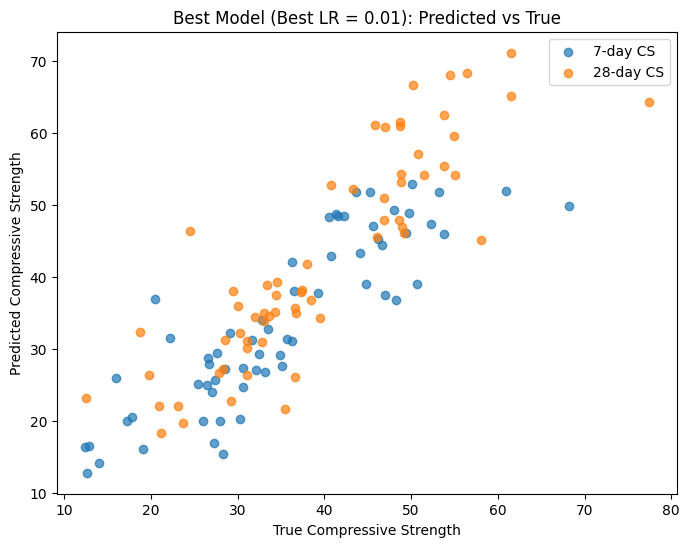

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设 X_scaled, y_7_scaled, y_28_scaled, targets_df 已经定义，
# 且 target_scaler 已经 fit 好原始目标数据，例如：
# target_scaler = StandardScaler()
# target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 先拆分出测试集，再从剩余数据中拆出验证集（例如 80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可以调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions (使用 Early Stopping)
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        # 训练一个 epoch
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # 每 10 个 epoch 打印一次训练损失
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # 使用 target_scaler 逆转换（请确保 target_scaler 已经 fit 过原始 target）
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Grid Search for Learning Rate using Validation Set with Early Stopping
# -----------------------------------------------------------------------------
num_epochs = 500
patience = 50
candidate_lrs = [0.01, 0.005, 0.001, 0.0005, 0.0001]
results = {}

for lr in candidate_lrs:
    print(f"\nGrid search: Training with learning rate = {lr}")
    # 为每个学习率初始化一个新模型
    model_temp = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
    optimizer_temp = optim.Adam(model_temp.parameters(), lr=lr)
    
    # 使用 early stopping 在验证集上评估
    model_temp, best_r2_val = train_gp_model_early_stopping(model_temp, train_loader, val_loader, t_fixed, optimizer_temp, num_epochs=num_epochs, patience=patience)
    print(f"Learning rate = {lr} => Best Validation Avg R²: {best_r2_val:.4f}")
    results[lr] = best_r2_val

best_lr = max(results, key=results.get)
print("\nBest Learning Rate (based on validation set):", best_lr)

# -----------------------------------------------------------------------------
# 8. 使用最佳 Learning Rate 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
model_best = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_best = optim.Adam(model_best.parameters(), lr=best_lr)
model_best, _ = train_gp_model_early_stopping(model_best, train_loader, val_loader, t_fixed, optimizer_best, num_epochs=num_epochs, patience=patience)

m_pred, y_pred = evaluate_gp_model(model_best, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Best Model (Best LR = {best_lr}): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Test dataset size: 126

Training final model with learning rate = 0.01
Epoch 10/400, NLL Loss: 2.7416
Epoch 20/400, NLL Loss: 2.0633
Epoch 30/400, NLL Loss: 1.7642
Epoch 40/400, NLL Loss: 1.5051
Epoch 50/400, NLL Loss: 1.2144
Epoch 60/400, NLL Loss: 1.0029
Epoch 70/400, NLL Loss: 0.8222
Epoch 80/400, NLL Loss: 0.6901
Epoch 90/400, NLL Loss: 0.6094
Epoch 100/400, NLL Loss: 0.6161
Epoch 110/400, NLL Loss: 0.5060
Epoch 120/400, NLL Loss: 0.3608
Epoch 130/400, NLL Loss: 0.7862
Epoch 140/400, NLL Loss: 0.4402
Epoch 150/400, NLL Loss: 0.4968
Epoch 160/400, NLL Loss: 0.3392
Epoch 170/400, NLL Loss: 0.2033
Epoch 180/400, NLL Loss: 0.1132
Epoch 190/400, NLL Loss: 0.6463
Epoch 200/400, NLL Loss: 0.1970
Epoch 210/400, NLL Loss: 0.0521
Epoch 220/400, NLL Loss: -0.0475
Epoch 230/400, NLL Loss: 1.2194
Epoch 240/400, NLL Loss: 0.5027
Epoch 250/400, NLL Loss: 0.1381
Epoch 260/400, NLL Loss: -0.0290
Epoch 270/400, NLL Loss: -0.1351
Epoch 280/400, NLL Loss: -0.

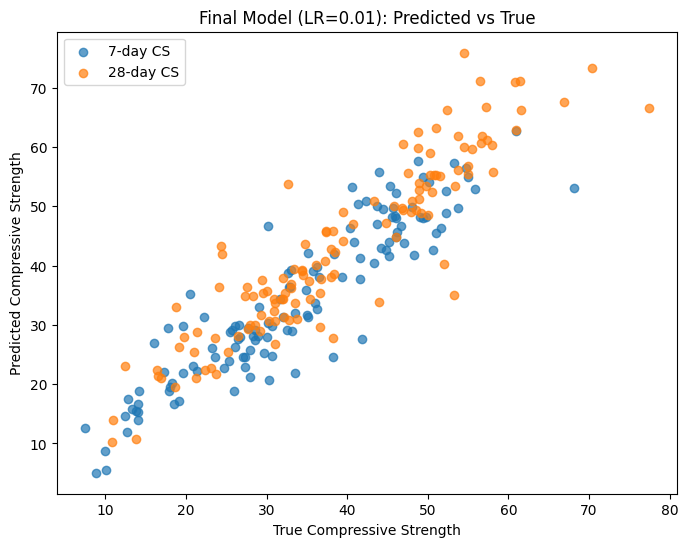

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设原始目标数据存储在 targets_df 中（包含7-day和28-day），先对其 fit
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df shape: (n_samples, 2)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义
X_train, X_test, y7_train, y7_test, y28_train, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition (AGP Model with hidden_dim1=64, hidden_dim2=32)
# -----------------------------------------------------------------------------
class AGPModelGP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(AGPModelGP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 5)
        self.softplus = nn.Softplus()
    
    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = F.relu(self.fc2(h))
        out = self.fc3(h)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions
# -----------------------------------------------------------------------------
def train_gp_model(model, dataloader, t, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{epochs}, NLL Loss: {avg_loss:.4f}")

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# 固定的 time vector (7, 28)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# -----------------------------------------------------------------------------
# 7. Final Model Training using Learning Rate = 0.01
# -----------------------------------------------------------------------------
final_epochs = 400
best_lr = 0.01  # 直接使用 0.01

model_final = AGPModelGP(input_dim, hidden_dim1=64, hidden_dim2=32).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)

print(f"\nTraining final model with learning rate = {best_lr}")
train_gp_model(model_final, train_loader, t_fixed, optimizer_final, epochs=final_epochs)

# -----------------------------------------------------------------------------
# 8. Evaluate on Test Set
# -----------------------------------------------------------------------------
m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()

# 使用 target_scaler 将预测值和真实值反变换到原始尺度
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. Visualize Test Set Results
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -1.3872, 28-day: -3.7500, Avg: -2.5686
Validation R²: 7-day: -1.1554, 28-day: -3.3140, Avg: -2.2347
Validation R²: 7-day: -0.9655, 28-day: -2.9288, Avg: -1.9472
Validation R²: 7-day: -0.7672, 28-day: -2.5138, Avg: -1.6405
Validation R²: 7-day: -0.5372, 28-day: -2.0283, Avg: -1.2828
Validation R²: 7-day: -0.2949, 28-day: -1.4970, Avg: -0.8959
Validation R²: 7-day: -0.0545, 28-day: -0.9596, Avg: -0.5071
Validation R²: 7-day: 0.1574, 28-day: -0.4703, Avg: -0.1565
Validation R²: 7-day: 0.3198, 28-day: -0.0904, Avg: 0.1147
Epoch 10/500, Training NLL Loss: 2.6700
Validation R²: 7-day: 0.4330, 28-day: 0.1999, Avg: 0.3164
Validation R²: 7-day: 0.4846, 28-day: 0.3107, Avg: 0.3977
Validation R²: 7-day: 0.5129, 28-day: 0.3293, Avg: 0.4211
Validation R²: 7-day: 0.5283, 28-day: 0.3397, Avg: 0.4340
Validation R²: 7-day: 0.5405, 28-day: 0.3551, Avg: 0.4478
Validation R²: 7-day: 0.5592, 2

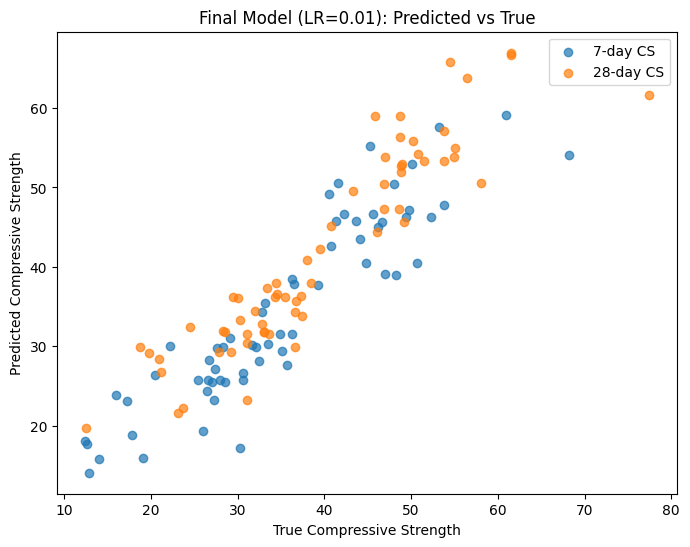

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# 假设原始目标数据存储在 targets_df 中（形状: (n_samples, 2)），先对其 fit
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df 是原始目标数据

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义
# 首先拆分出测试集，再从剩余数据中拆分出验证集 (80%/10%/10%)
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch（根据数据大小可调整 batch size）
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)  # 输出 5 个参数
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# 使用改进模型
model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]  # 例如 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为 2 (7, 28)
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5*(diff**2)/(l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. 使用最佳 Learning Rate 0.01: 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
final_epochs = 500
best_lr = 0.01

model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=final_epochs, patience=50)

m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -0.9015, 28-day: -2.8053, Avg: -1.8534
Validation R²: 7-day: -0.8202, 28-day: -2.6253, Avg: -1.7228
Validation R²: 7-day: -0.6976, 28-day: -2.3635, Avg: -1.5305
Validation R²: 7-day: -0.5464, 28-day: -2.0516, Avg: -1.2990
Validation R²: 7-day: -0.3799, 28-day: -1.7112, Avg: -1.0456
Validation R²: 7-day: -0.2174, 28-day: -1.3763, Avg: -0.7968
Validation R²: 7-day: -0.0506, 28-day: -1.0248, Avg: -0.5377
Validation R²: 7-day: 0.1042, 28-day: -0.6800, Avg: -0.2879
Validation R²: 7-day: 0.2424, 28-day: -0.3287, Avg: -0.0431
Epoch 10/300, Training NLL Loss: 2.8782
Validation R²: 7-day: 0.3409, 28-day: -0.0504, Avg: 0.1452
Validation R²: 7-day: 0.4018, 28-day: 0.1596, Avg: 0.2807
Validation R²: 7-day: 0.4251, 28-day: 0.2899, Avg: 0.3575
Validation R²: 7-day: 0.4279, 28-day: 0.3646, Avg: 0.3962
Validation R²: 7-day: 0.4486, 28-day: 0.4208, Avg: 0.4347
Validation R²: 7-day: 0.4767,

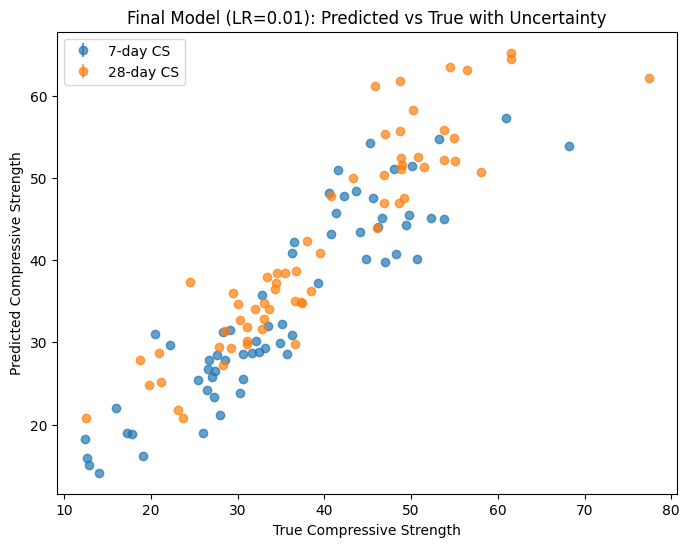

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# Preprocessing: Fit the target scaler on the original targets.
# targets_df is assumed to be a 2D array with shape (n_samples, 2)
# This scaler will be used later to inverse-transform predictions.
# ----------------------------------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # Convert features to a torch tensor of type float32.
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack the two target arrays (7-day and 28-day) and convert to tensor.
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples.
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# First split out the test set (10%), then split the remaining data into train and validation (approx. 80%/10%).
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # about 10% for validation

# Create datasets for train, validation, and test.
train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Create DataLoaders (using full-batch training).
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        # First fully connected layer with BatchNorm.
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        # Second fully connected layer with BatchNorm.
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        # Third fully connected layer with BatchNorm.
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        # Dropout layer to help prevent overfitting.
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer to predict 5 GP parameters.
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()  # Ensure positivity for some outputs.
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        # theta1 and theta2 define the mean function: m(t) = theta1 * log(t) + theta2
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        # l, sigma_f, sigma_n are GP hyperparameters; we ensure they are positive using exp.
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# Set model class and input dimension.
model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1] 

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    # Get batch size and number of time points (should be 2: 7 and 28).
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        # Mean function: m(t) = theta1 * log(t) + theta2.
        m = theta1[i] * log_t + theta2[i]
        # Compute pairwise differences of time points.
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        # Compute RBF kernel.
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set.
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        # Inverse transform using the fitted target_scaler.
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            # Compute the predicted mean using the mean function: m(t) = theta1 * log(t) + theta2.
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Predict with Uncertainty
# -----------------------------------------------------------------------------
def predict_with_uncertainty(model, dataloader, t, epsilon=1e-6):
    """
    For each sample, compute the predicted mean and predictive variance.
    Predicted mean m = theta1 * log(t) + theta2.
    For each sample, compute the kernel matrix K based on predicted hyperparameters,
    then for each time point j, compute:
        var_j = K[j,j] - k_j^T * K^{-1} * k_j
    Ensure var_j is non-negative.
    """
    model.eval()
    t = t.to(device)
    all_means, all_vars, all_y = [], [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            # Compute predicted mean for each sample.
            m = theta1.unsqueeze(1) * torch.log(t + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            batch_vars = []
            for i in range(z.size(0)):
                diff = t.unsqueeze(0) - t.unsqueeze(1)  # shape: (n_t, n_t)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t.size(0), device=t.device)
                K = K + epsilon * torch.eye(t.size(0), device=t.device)
                K_inv = torch.linalg.inv(K)
                var_sample = []
                for j in range(t.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_j = max(var_j, 0)  # Ensure non-negative variance.
                    var_sample.append(var_j)
                batch_vars.append(var_sample)
            all_means.append(m.cpu())
            all_vars.append(torch.tensor(batch_vars))
            all_y.append(y.cpu())
    m_all = torch.cat(all_means, dim=0)
    var_all = torch.cat(all_vars, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, var_all, y_all

# -----------------------------------------------------------------------------
# 8. Final Model Training with LR = 0.01 and Early Stopping, then Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 300
patience = 50
best_lr = 0.01

# Initialize final model using the improved model architecture.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
# Train model using early stopping based on validation set performance.
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use predict_with_uncertainty to get predictive mean and variance on the test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

# Inverse transform predictions and true targets to original scale.
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# 9. Visualize Test Set Results with Uncertainty (using error bars)
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# Use square root of variance as standard deviation for error bars.
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=np.sqrt(var_pred_np[:, 0]), fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=np.sqrt(var_pred_np[:, 1]), fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()


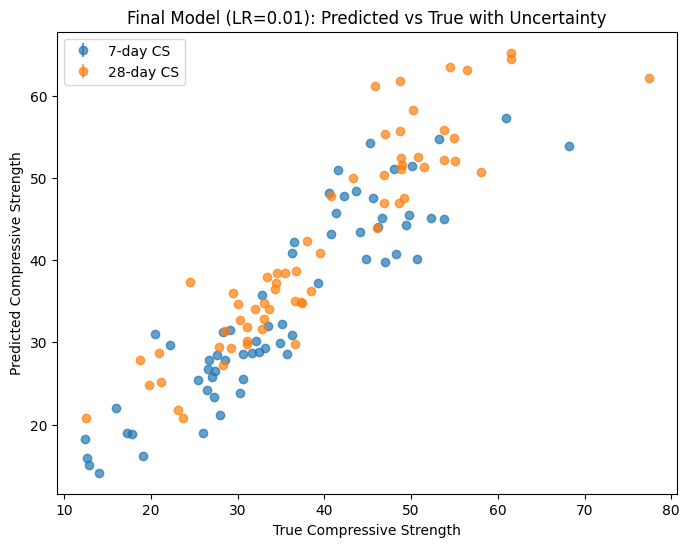

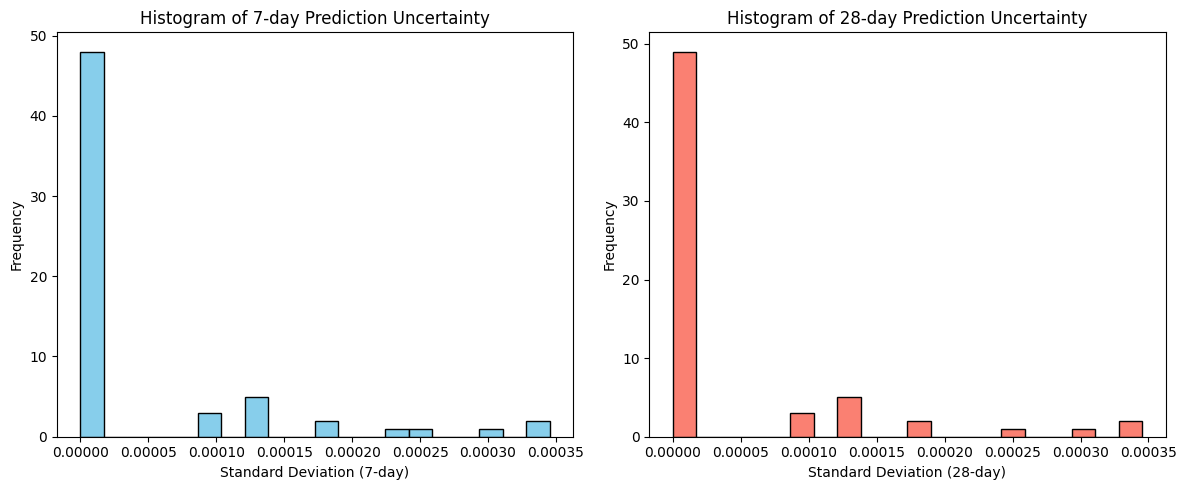

In [41]:
# -----------------------------------------------------------------------------
# Visualize Test Set Results with Uncertainty using error bars and histograms.
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# Use the square root of variance as standard deviation.
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=np.sqrt(var_pred_np[:, 0]), fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=np.sqrt(var_pred_np[:, 1]), fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()

# Additionally, plot histograms of the uncertainties for each target.
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(np.sqrt(var_pred_np[:, 0]), bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Standard Deviation (7-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 7-day Prediction Uncertainty")

plt.subplot(1,2,2)
plt.hist(np.sqrt(var_pred_np[:, 1]), bins=20, color='salmon', edgecolor='black')
plt.xlabel("Standard Deviation (28-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 28-day Prediction Uncertainty")

plt.tight_layout()
plt.show()

Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -2.0106, 28-day: -5.4279, Avg: -3.7192
Validation R²: 7-day: -1.8852, 28-day: -5.1150, Avg: -3.5001
Validation R²: 7-day: -1.7532, 28-day: -4.7978, Avg: -3.2755
Validation R²: 7-day: -1.6239, 28-day: -4.4669, Avg: -3.0454
Validation R²: 7-day: -1.4629, 28-day: -4.0645, Avg: -2.7637
Validation R²: 7-day: -1.2451, 28-day: -3.5328, Avg: -2.3890
Validation R²: 7-day: -0.9742, 28-day: -2.8831, Avg: -1.9286
Validation R²: 7-day: -0.6513, 28-day: -2.1194, Avg: -1.3854
Validation R²: 7-day: -0.3370, 28-day: -1.3885, Avg: -0.8628
Epoch 10/500, Training NLL Loss: 2.5531
Validation R²: 7-day: -0.0554, 28-day: -0.7497, Avg: -0.4025
Validation R²: 7-day: 0.1454, 28-day: -0.2929, Avg: -0.0738
Validation R²: 7-day: 0.2747, 28-day: 0.0134, Avg: 0.1440
Validation R²: 7-day: 0.3390, 28-day: 0.2113, Avg: 0.2752
Validation R²: 7-day: 0.3541, 28-day: 0.3291, Avg: 0.3416
Validation R²: 7-day: 0

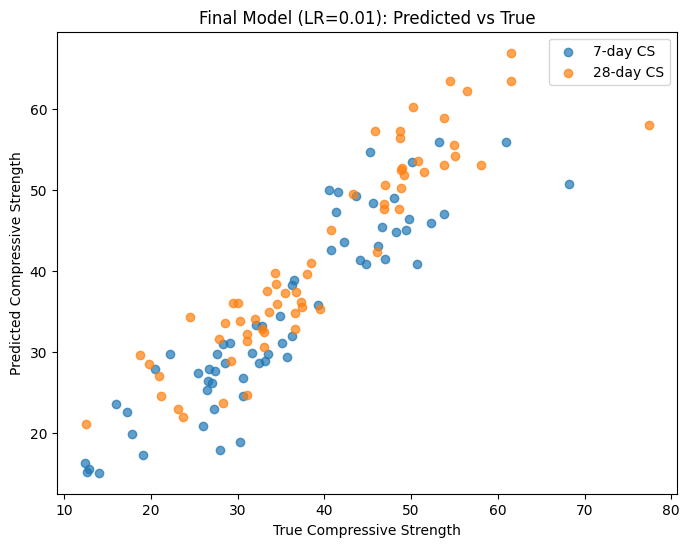

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# -----------------------------------------------------------------------------
# 假设原始目标数据存储在 targets_df 中（形状: (n_samples, 2)），先对其 fit
# -----------------------------------------------------------------------------
# 请确保 targets_df 已定义，例如：targets_df = pd.read_csv('your_target_file.csv')
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # targets_df 是原始目标数据

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # 将7天和28天的目标值组合为 (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # 时间向量固定为 [7.0, 28.0]
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# 假设 X_scaled, y_7_scaled, y_28_scaled 已经正确定义（例如从 CSV 中读取或其他预处理方式）
# 这里先拆分出测试集，再从剩余数据中拆分出验证集（比例大约80%/10%/10%）
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # 约10%作验证集

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# 使用 full-batch，根据数据量可调整 batch size
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: AGPModelGP_log with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_log(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_log, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)  # 输出5个参数
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

# input_dim 为输入特征数量（例如，如果每个样本有22个特征，则 input_dim 为22）
input_dim = X_scaled.shape[1]

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function (使用对数时间轴计算 kernel)
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    """
    theta1, theta2: 用于均值函数 m(t) = theta1 * log(t) + theta2
    l, sigma_f, sigma_n: 用于 kernel，其中
      k(t, t') = sigma_f^2 * exp(-(log(t) - log(t'))^2 / (2 * l^2)) + sigma_n^2 * I
    t: 时间向量，形状 (2,) [7.0, 28.0]
    y: 目标值，形状 (batch_size, 2)
    """
    batch_size = y.shape[0]
    n_t = t.shape[0]  # 应为2 (7, 28)
    total_nll = 0.0
    # 计算 log(t)
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        # 均值函数： m(t) = theta1 * log(t) + theta2
        m = theta1[i] * log_t + theta2[i]
        # 计算对数时间差值： diff_log = log(t) - log(t')
        diff_log = log_t.unsqueeze(0) - log_t.unsqueeze(1)
        # 对数时间轴上的 RBF kernel
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff_log**2) / (l[i]**2))
        # 加入噪声项
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # 在验证集上评估
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            # 均值函数： m(t) = theta1 * log(t) + theta2
            m = theta1.unsqueeze(1) * torch.log(t.to(device) + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. 使用最佳 Learning Rate 0.01 重新训练模型并在 Test Set 上评估
# -----------------------------------------------------------------------------
final_epochs = 500
best_lr = 0.01

# 固定时间向量 t
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

model_final = AGPModelGP_log(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=final_epochs, patience=50)

m_pred, y_pred = evaluate_gp_model(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
y_pred_np = y_pred.numpy()
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

plt.figure(figsize=(8,6))
plt.scatter(y_true_original[:, 0], y_pred_original[:, 0], label="7-day CS", alpha=0.7)
plt.scatter(y_true_original[:, 1], y_pred_original[:, 1], label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title("Final Model (LR=0.01): Predicted vs True")
plt.show()


Using device: cuda
Train dataset size: 504
Validation dataset size: 63
Test dataset size: 63
Validation R²: 7-day: -2.2144, 28-day: -5.7341, Avg: -3.9742
Validation R²: 7-day: -2.1453, 28-day: -5.4870, Avg: -3.8162
Validation R²: 7-day: -2.1232, 28-day: -5.3443, Avg: -3.7338
Validation R²: 7-day: -2.0864, 28-day: -5.1801, Avg: -3.6333
Validation R²: 7-day: -2.0105, 28-day: -4.9602, Avg: -3.4853
Validation R²: 7-day: -1.8685, 28-day: -4.6304, Avg: -3.2495
Validation R²: 7-day: -1.6544, 28-day: -4.1691, Avg: -2.9117
Validation R²: 7-day: -1.3741, 28-day: -3.5902, Avg: -2.4821
Validation R²: 7-day: -1.0812, 28-day: -2.9882, Avg: -2.0347
Epoch 10/500, Training NLL Loss: 3.9011
Validation R²: 7-day: -0.7876, 28-day: -2.3902, Avg: -1.5889
Validation R²: 7-day: -0.5106, 28-day: -1.8377, Avg: -1.1741
Validation R²: 7-day: -0.2780, 28-day: -1.3741, Avg: -0.8260
Validation R²: 7-day: -0.0870, 28-day: -0.9851, Avg: -0.5361
Validation R²: 7-day: 0.0643, 28-day: -0.6638, Avg: -0.2998
Validation R²:

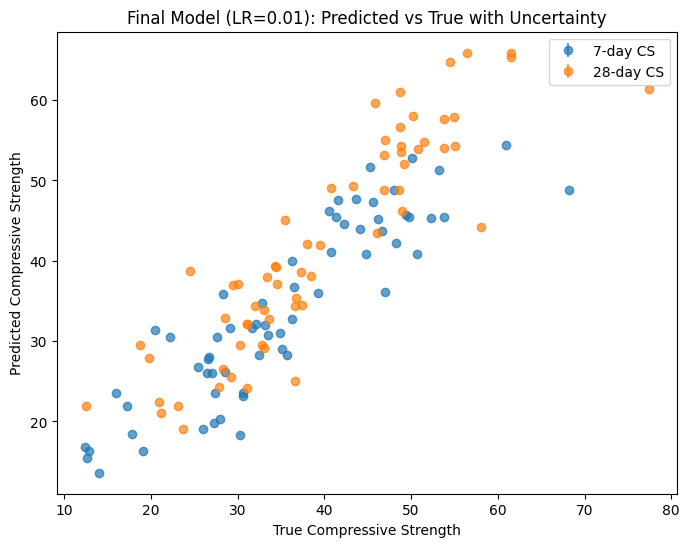

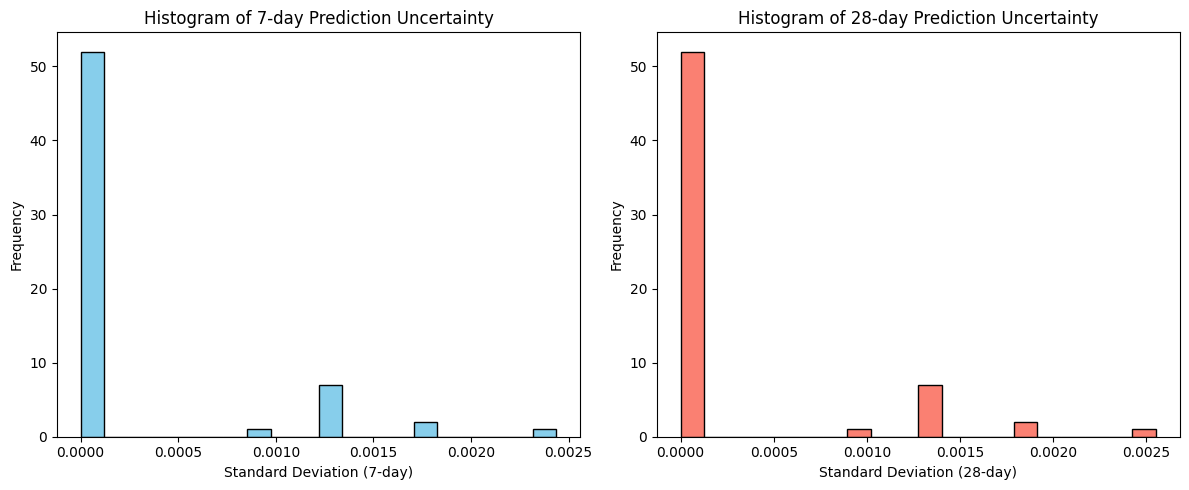

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Preprocessing: Fit the target scaler on original targets.
# targets_df is the original target data with shape (n_samples, 2)
# ------------------------------
target_scaler = StandardScaler()
target_scaler.fit(targets_df)  # Fit scaler on the original target data

# -----------------------------------------------------------------------------
# 1. Setup Device
# -----------------------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -----------------------------------------------------------------------------
# 2. Dataset Definition
# -----------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        # Stack targets (7-day and 28-day) and convert to a tensor
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# -----------------------------------------------------------------------------
# 3. Data Split (Train/Validation/Test)
# -----------------------------------------------------------------------------
# First split out the test set, then split the remaining data into train and validation (~80%/10%/10%)
X_temp, X_test, y7_temp, y7_test, y28_temp, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.1, random_state=42)
X_train, X_val, y7_train, y7_val, y28_train, y28_val = train_test_split(
    X_temp, y7_temp, y28_temp, test_size=0.1111, random_state=42)  # about 10% for validation

train_dataset = ConcreteDatasetScaled(X_train, y7_train, y28_train)
val_dataset   = ConcreteDatasetScaled(X_val, y7_val, y28_val)
test_dataset  = ConcreteDatasetScaled(X_test, y7_test, y28_test)

# Create DataLoaders (using full-batch for simplicity)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader   = DataLoader(val_dataset, batch_size=len(val_dataset))
test_loader  = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Train dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))

# -----------------------------------------------------------------------------
# 4. Model Definition: Improved AGP Model (AGPModelGP_v2) with BatchNorm & Dropout
# -----------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2):
        super(AGPModelGP_v2, self).__init__()
        # First layer with BatchNorm
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        
        # Second layer with BatchNorm
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        
        # Third layer with BatchNorm
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        # Final output layer for 5 GP parameters
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        # theta1 and theta2 form the mean function: m(t)=theta1*log(t)+theta2
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        # Other GP hyperparameters, ensured to be positive via exp.
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]  # e.g., 22

# -----------------------------------------------------------------------------
# 5. GP Negative Log Likelihood Loss Function
# -----------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]  # Should be 2 ([7, 28])
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5*(diff**2)/(l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        try:
            L_mat = torch.linalg.cholesky(K)
        except RuntimeError as e:
            print("Cholesky decomposition failed for sample", i)
            raise e
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# -----------------------------------------------------------------------------
# 6. Training and Evaluation Functions with Early Stopping
# -----------------------------------------------------------------------------
def train_gp_model_early_stopping(model, train_loader, val_loader, t, optimizer, num_epochs=500, patience=50):
    best_r2 = -np.inf
    best_model_wts = copy.deepcopy(model.state_dict())
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch+1) % 10 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
        
        # Evaluate on validation set
        m_val, y_val = evaluate_gp_model(model, val_loader, t)
        m_val_np = m_val.numpy()
        y_val_np = y_val.numpy()
        y_val_pred = target_scaler.inverse_transform(m_val_np)
        y_val_true = target_scaler.inverse_transform(y_val_np)
        r2_7_val = r2_score(y_val_true[:, 0], y_val_pred[:, 0])
        r2_28_val = r2_score(y_val_true[:, 1], y_val_pred[:, 1])
        avg_r2_val = (r2_7_val + r2_28_val) / 2
        print(f"Validation R²: 7-day: {r2_7_val:.4f}, 28-day: {r2_28_val:.4f}, Avg: {avg_r2_val:.4f}")
        
        if avg_r2_val > best_r2:
            best_r2 = avg_r2_val
            best_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
    model.load_state_dict(best_model_wts)
    return model, best_r2

def evaluate_gp_model(model, dataloader, t, epsilon=1e-6):
    model.eval()
    all_m, all_y = [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, _, _, _ = model(z)
            m = theta1.unsqueeze(1) * torch.log(t.to(device)+epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_m.append(m.cpu())
            all_y.append(y.cpu())
    m_all = torch.cat(all_m, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, y_all

# -----------------------------------------------------------------------------
# 7. Predict with Uncertainty Function
# -----------------------------------------------------------------------------
def predict_with_uncertainty(model, dataloader, t, epsilon=1e-6):
    """
    For each sample, compute the predicted mean and predictive variance.
    Predicted mean: m = theta1 * log(t) + theta2.
    For each sample, compute the kernel matrix K based on predicted hyperparameters,
    then for each time point j, compute:
        var_j = K[j,j] - k_j^T * K^{-1} * k_j
    Ensure that var_j is non-negative.
    """
    model.eval()
    t = t.to(device)
    all_means, all_vars, all_y = [], [], []
    with torch.no_grad():
        for z, _, y in dataloader:
            z, y = z.to(device), y.to(device)
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            batch_vars = []
            for i in range(z.size(0)):
                diff = t.unsqueeze(0) - t.unsqueeze(1)  # (n_t, n_t)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t.size(0), device=t.device)
                K = K + epsilon * torch.eye(t.size(0), device=t.device)
                K_inv = torch.linalg.inv(K)
                var_sample = []
                for j in range(t.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_j = max(var_j, 0)
                    var_sample.append(var_j)
                batch_vars.append(var_sample)
            all_means.append(m.cpu())
            all_vars.append(torch.tensor(batch_vars))
            all_y.append(y.cpu())
    m_all = torch.cat(all_means, dim=0)
    var_all = torch.cat(all_vars, dim=0)
    y_all = torch.cat(all_y, dim=0)
    return m_all, var_all, y_all

# -----------------------------------------------------------------------------
# 8. Final Model Training with LR = 0.01 and Early Stopping, then Evaluation on Test Set
# -----------------------------------------------------------------------------
num_epochs = 500
patience = 50
best_lr = 0.01

# Initialize final model using the improved architecture.
model_final = model_class(input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.2).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
model_final, best_val_r2 = train_gp_model_early_stopping(model_final, train_loader, val_loader, t_fixed, optimizer_final, num_epochs=num_epochs, patience=patience)

# Use predict_with_uncertainty on the test set.
m_pred, var_pred, y_pred = predict_with_uncertainty(model_final, test_loader, t_fixed)
m_pred_np = m_pred.numpy()
var_pred_np = var_pred.numpy()
y_pred_np = y_pred.numpy()

# Inverse transform predictions and true targets to original scale.
y_pred_original = target_scaler.inverse_transform(m_pred_np)
y_true_original = target_scaler.inverse_transform(y_pred_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Final Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# -----------------------------------------------------------------------------
# Print out uncertainty values for the first few samples (in original scale)
# -----------------------------------------------------------------------------
# Convert variance from scaled space to original space: var_orig = (scale^2)*var_scaled
scale_factors = target_scaler.scale_  # This is a 1D array with 2 elements
print("Predicted uncertainty (standard deviation in original scale) for first 5 samples:")
for i in range(min(5, var_pred_np.shape[0])):
    std_7 = scale_factors[0] * np.sqrt(var_pred_np[i, 0])
    std_28 = scale_factors[1] * np.sqrt(var_pred_np[i, 1])
    print(f"Sample {i+1}: 7-day std: {std_7:.4f}, 28-day std: {std_28:.4f}")

# -----------------------------------------------------------------------------
# Visualize Test Set Results with Uncertainty using error bars and histograms.
# -----------------------------------------------------------------------------
plt.figure(figsize=(8,6))
# For error bars, convert the uncertainty to original scale:
error_7 = scale_factors[0] * np.sqrt(var_pred_np[:, 0])
error_28 = scale_factors[1] * np.sqrt(var_pred_np[:, 1])
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0], yerr=error_7, fmt='o', label="7-day CS", alpha=0.7)
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1], yerr=error_28, fmt='o', label="28-day CS", alpha=0.7)
plt.xlabel("True Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.legend()
plt.title(f"Final Model (LR=0.01): Predicted vs True with Uncertainty")
plt.show()

# Additionally, plot histograms of the uncertainties (standard deviations in original scale)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(error_7, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Standard Deviation (7-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 7-day Prediction Uncertainty")
plt.subplot(1,2,2)
plt.hist(error_28, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Standard Deviation (28-day)")
plt.ylabel("Frequency")
plt.title("Histogram of 28-day Prediction Uncertainty")
plt.tight_layout()
plt.show()
